# 01: Úvod a vizualizace

## Import základních balíčků

### NumPy 
  * Balíček pro rychlé „vědecké“ výpočty (zejména lineární algebra a náhodná čísla).
  * Většinou se jedná jen o interface k vysoce optimalizovaným C/C++/Fortran knihovnám.
  * http://www.numpy.org/

### pandas
  * Oblíbený nástroj pro datovou analýzu.
  * Pomáhá usnadnit práci s tabulkovými daty.
  * http://pandas.pydata.org/

### scikit-learn (sklearn)
  * Soubor nástrojů datové vědy psaný v Pythonu.
  * Staví na NumPy, [SciPy](https://www.scipy.org/) a matplotlib
  * http://scikit-learn.org/stable/
  
### matplotlib
  * Základní knihovna pro vykreslování grafů.
  * https://matplotlib.org/

### seaborn
  * Nástroj pro vizualizaci dat, založený na matplotlib.
  * https://seaborn.pydata.org/

In [4]:
import numpy as np
import pandas as pd
import sklearn as skit
import matplotlib.pyplot as plt
import seaborn as sns
import html5lib
import requests

## Základní práce s daty pomocí knihovny pandas

  - Načtěte datasety data1.csv a data2.csv pomocí pandas.
  - Zjistěte, jakých typů jsou data ve sloupcích (obsahují stringy, čísla, ...? Jaký mají rozsah?)

### Načítání dat

  - Načítání dat z csv souborů do pandas typu DataFrame.

In [5]:
data1 = pd.read_csv('data1.csv')
data2 = pd.read_csv('data2.csv',sep=';')

### Pomocí pandas funkcí si můžeme zobrazit základní informace o datasetu

In [6]:
df = data2
df.head()
#df.info()
    #data1.info()
#df.describe()
#df.isnull().sum()
#df.notnull().sum()
#display(df.head())
#df.head()

Unnamed: 0  PassengerId  Survived  Pclass  \
0           0            1         1       1   
1           1            2         0       3   
2           2            3         0       3   
3           3            4         1       3   
4           4            5         1       1   

                                                Name     Sex  BirthYear  \
0  Rothes, the Countess. of (Lucy Noel Martha Dye...  female     1879.0   
1                                 Garfirth, Mr. John    male        NaN   
2                     Nirva, Mr. Iisakki Antino Aijo    male     1871.0   
3                              Barah, Mr. Hanna Assi    male     1892.0   
4          Carter, Mrs. William Ernest (Lucile Polk)  female     1876.0   

   FootSize  SibSp  Parch            Ticket       Fare    Cabin Embarked  
0        31      0      0            110152    86.5000      B77        S  
1        39      0      0            358585    14.5000      NaN        S  
2        35      0      0  SOTON/O2 3101272  7125.0000      NaN        S  
3        54      0      0              2663     7.2292      NaN        C  
4        18      1      2            113760   120.0000  B96 B98        S

### Základy přístupu k datům 

In [7]:
#data1['Age'] # vrátí sloupec se jménem (pandas.Series.name) Age
#data1.Age # totéž co výše
#data1['Age'][:10] # vrátí prvních 10 záznamů ze sloupce Age 
#data1['Age'][:3][[True, False, True]]
#data1['Age'] > 30 # podmínka se použije na všechny záznamy -> vrací pandas.Series s výsledky (hodnoty True nebo False)
#data1[data1['Age'] > 30] # vrátí jen osoby starší než 30 let
#data1[['Age', 'Survived']].head() # vrátí jen zadané sloupce
#data1_tmp = data1.copy() # vytvoří hlubokou kopii dataframe
#data1_tmp.columns = range(12) # přejmenování sloupců
#display(data1.head())
#data1_tmp.head()
#data1[1:2] # vrací první řádek
#data1.loc[1,['Age', 'Sex']] # indexy (viz .loc? a .iloc?)

## Úloha 01: Zřetězení dat

  - Připojte data2.csv za data1.csv následujícím způsobem:
      - Data (sloupce), která nejsou v data1.csv jsou v data2.csv vynechána.
      - Spočítejte věk pomocí sloupce BirthYear (rok narození) v data2.csv a uložte jej do sloupce Age.
      - PasangerId musí být unikátní.
      - Použijte metodu pandas.concat.

In [8]:
# make a deep copy
data2_tmp = data2.copy()
# drop footsize and first column from data2
data2_tmp = data2_tmp.drop('FootSize', axis = 1) . drop(data2_tmp.columns[0], axis = 1)
# change birthdate to age
data2_tmp['BirthYear'] = 1912 - data2_tmp['BirthYear']
data2_tmp = data2_tmp.rename({'BirthYear' : 'Age'}, axis = 1)
#concatenate
data = pd.concat([data1, data2_tmp], axis = 0, ignore_index=True)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

## Vizualizace pomocí pandas a seaborn

In [9]:
import matplotlib.pyplot as plt # takto se matplotlib standardně importuje
import matplotlib
# bez násl. řádku někdy nefunguje vykreslování grafů v Jupyter noteboocích
%matplotlib inline 
matplotlib.style.use('ggplot')

### Vliv sloupců Pclass, Age a Sex na přežití cestujících

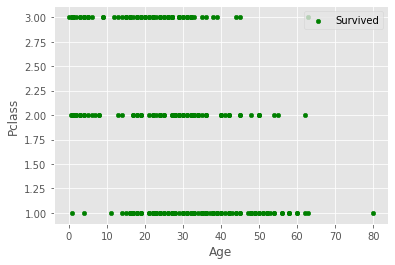

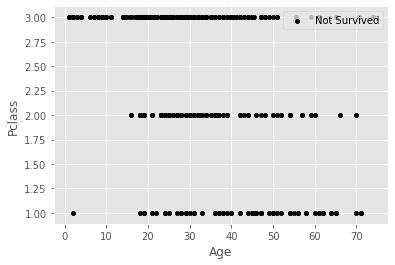

In [10]:
# data.plot() # výchozí chování metody plot()
#podívejte se, jaké druhy grafů jsou k dispozici
data.plot?

# získání přeživších a nepřeživších osob
survived = data[data['Survived'] == 1]
not_survived = data[data['Survived'] == 0]

ax = survived.plot.scatter(x='Age', y='Pclass', color='Green', label='Survived')
not_survived.plot(x='Age', y='Pclass', kind='scatter', color='Black', label='Not Survived')
# vykreslení grafů do jednoho obrázku:
# not_survived.plot.scatter(x='Age', y='Pclass', color='Black', label='Not Survived', ax = ax)

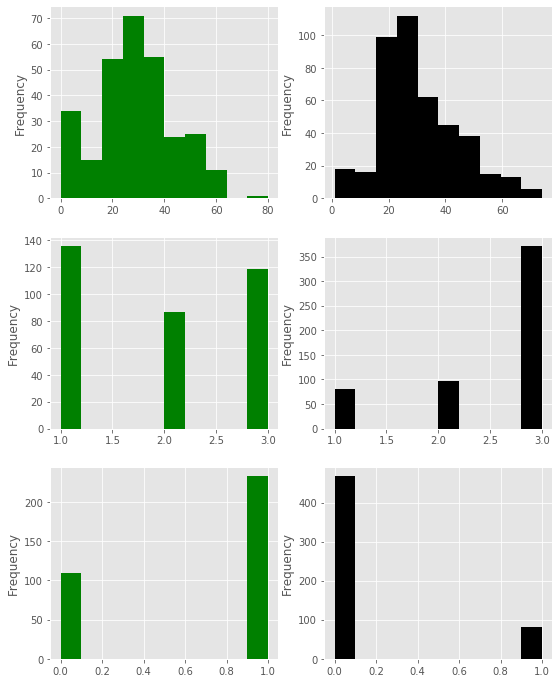

In [11]:
plt.figure(figsize=(9,12)) # velikost figsize se určuje v palcích (angl. inches)
plt.subplot(321) # tři řádky a dva sloupce, přiřaď následující graf do prvního slotu
survived['Age'].plot.hist(color='Green')
plt.subplot(322)
not_survived['Age'].plot.hist(color='Black')
plt.subplot(323)
survived['Pclass'].plot.hist(color='Green')
plt.subplot(324)
not_survived['Pclass'].plot.hist(color='Black')
plt.subplot(325)
survived['Sex'].apply(lambda x: 1 if x == 'female' else 0).plot.hist(color='Green')
plt.subplot(326)
not_survived['Sex'].apply(lambda x: 1 if x == 'female' else 0).plot.hist(color='Black')

## Seaborne: jak zjistit vztahy mezi příznaky

          Survived    Pclass       Sex       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481  0.543351 -0.077128 -0.035322  0.081629 -0.027145
Pclass   -0.338481  1.000000 -0.131900 -0.369388  0.083081  0.018443  0.084197
Sex       0.543351 -0.131900  1.000000 -0.093223  0.114631  0.245489  0.026989
Age      -0.077128 -0.369388 -0.093223  1.000000 -0.308126 -0.189056 -0.104007
SibSp    -0.035322  0.083081  0.114631 -0.308126  1.000000  0.414838  0.116760
Parch     0.081629  0.018443  0.245489 -0.189056  0.414838  1.000000  0.159925
Fare     -0.027145  0.084197  0.026989 -0.104007  0.116760  0.159925  1.000000


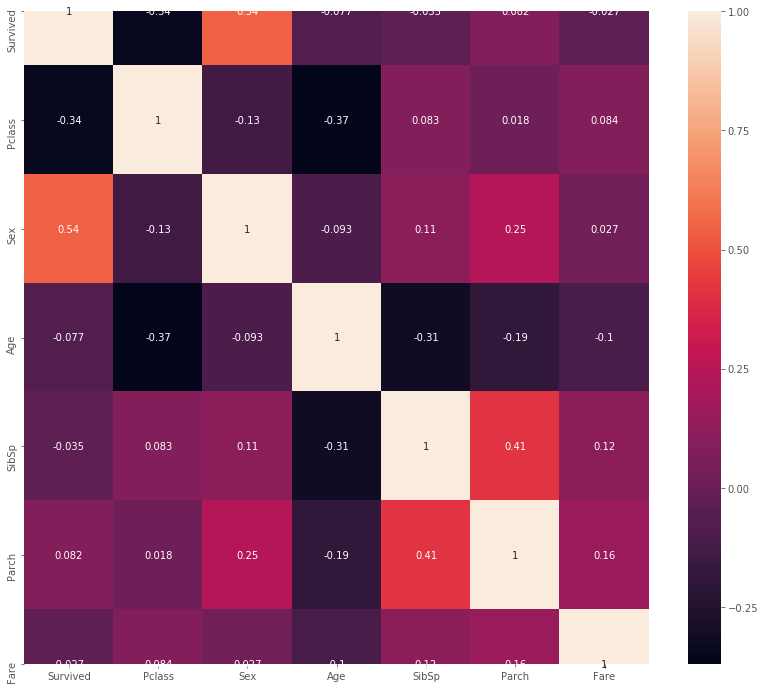

In [12]:
plt.figure(figsize=(14,12))
data['Sex'] = data['Sex'].apply(lambda x: 1 if x == 'female' else 0)
cor_matrix = data.drop('PassengerId', axis=1).corr()
print(cor_matrix)
sns.heatmap(cor_matrix, annot=True)

## Úloha 02: vytvořte bodový graf (scatter plot) pro všechny dvojice příznaků

  - K vykreslení všech (smysluplných) dvojic příznaků použijte metodu sns.pairplot, podobným způsobem jako metodu níže.

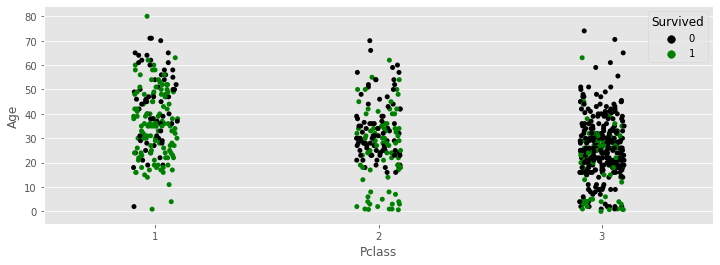

In [13]:
plt.figure(figsize=(12,4))
(x="Pclass", y="Age", hue="Survived", data=data, palette= ['black','green']) # add jitter=True

In [14]:
### sem napište svůj kód

## Stahování dat z webu pomocí Pythonu a pandas (1. úkol)
          
### Tipy pro scrapping s Pythonem:
   - K získání HTML zdrojáku stránky s `url` použijte `import requests`: 
      - `r = requests.get(url)`
      - `html = r.text`
   - Metoda `pandas.read_html(r.text)` uloží všechny tabulky `<table>` jako seznam pandas DataFrames:
      - `list_of_data_frames = pd.read_html(html,flavor='html5lib')`
   - Pro HTML parsování lze použít `from bs4 import BeautifulSoup`.

In [15]:
# příklad pro statutární město Kladno, výsledky voleb pro rok 2010
url = 'https://www.volby.cz/pls/kv2010/kv1111?xjazyk=CZ&xid=0&xdz=3&xnumnuts=2103&xobec=532053&xstat=0&xvyber=0' # výsledky voleb
dfs = pd.read_html(url,flavor='html5lib')

dfs[1].head(10)

Kandidátní listina                                    Hlasy        \
               číslo                           název     abs.   v %   
0                  1    Česká str.sociálně demokrat.  139 603  2217   
1                  2  KOMUNISTICKÁ STR.ČECH A MORAVY   76 243  1211   
2                  3   Volte Pr.Blok www.cibulka.net      376     6   
3                  4   Strana svob.občanů (Svobodní)    1 022    16   
4                  5    Občanská demokratická strana  218 326  3467   
5                  6      LEPŠÍ KLADNO-(SNK,VV, KAN)   20 365   323   
6                  7                VOLBA PRO KLADNO  113 768  1807   
7                  8               Věci veřejné (VV)   11 076   176   
8                  9   Křesť.demokr.unie-Čs.str.lid.   13 137   209   
9                 10                          TOP 09   35 745   568   

  Početkandidátů Přepočtenýzákladdle počtukandidátů  \
  Početkandidátů Přepočtenýzákladdle počtukandidátů   
0             33                         629 661,00   
1             33                         629 661,00   
2              1                          19 080,63   
3              4                          76 322,54   
4             33                         629 661,00   
5             32                         610 580,36   
6             33                         629 661,00   
7             33                         629 661,00   
8             33                         629 661,00   
9             33                         629 661,00   

  Přepočtené %platných hlasů Početmandátů Podílyhlasů  
  Přepočtené %platných hlasů Početmandátů Podílyhlasů  
0                       2217            8           X  
1                       1210            4           X  
2                        197            0           -  
3                        133            0           -  
4                       3467           13           X  
5                        333            0           -  
6                       1806            6           X  
7                        175            0           -  
8                        208            0           -  
9                        567            2           X

### Pro zajímavost (z loňského roku): Příklad jednoduchého stažení dat z webu pomocí POST formuláře.

Úkolem je stáhnout všechna data z http://kap.ujak.cz/index.php a uložit je ve formátu pandas DataFrame.

In [16]:
# url s formulářem
url = 'http://kap.ujak.cz/index.php?strana={}'
# nastavení POST proměnných simulující odeslání formuláře
data = {
    'typ' : 'kap',
    'prace' : 'BP', # DP = diplomka, DR = disertace, RI = rigorozní
    'nazev' : '%%%', # alespoň tři písmena z názvu hledané práce
    'pocet' : '0',
    'klic' : '', # alespoň tři písmena z klíčových slov
    'kl' : 'c', # c = částečně odpovídá, n = plně odpovídá
    'hledat' : 'Vyhledat'
}

data_all = pd.DataFrame()
for prace in ['BP', 'DP']:
    data['prace'] = prace
    r = requests.post(url, data)
    r.encoding='cp1250'
    ldf = pd.read_html(r.text,flavor='html5lib', header=0)
    df = ldf[0]
    strana = 30
    if data_all.shape[0] == 0:
        data_all = df.copy()
    else:
        data_all = pd.concat([data_all,df], ignore_index=True)
    while df.shape[0] > 0:
        if data_all.shape[0] > 200: # just to prevent from downloading all data
            break
        print(url.format(strana))
        r = requests.post(url.format(strana), data)
        r.encoding='cp1250'
        ldf = pd.read_html(r.text,flavor='html5lib', header=0)
        df = ldf[0]
        strana = strana + 30
        data_all = pd.concat([data_all,df], ignore_index=True)

http://kap.ujak.cz/index.php?strana=30
http://kap.ujak.cz/index.php?strana=60
http://kap.ujak.cz/index.php?strana=90
http://kap.ujak.cz/index.php?strana=120
http://kap.ujak.cz/index.php?strana=150
http://kap.ujak.cz/index.php?strana=180


In [17]:
dataUJAK = pd.read_csv('ujak.csv', index_col=0)
display(dataUJAK.head())
dataUJAK[dataUJAK['Rok'] > 2000].groupby(['Název práce']).size().sort_values(ascending=False)

Autor                                        Název práce  \
0     Abdrakhmanova Aizhan          Vliv médií na děti a mládež v Kazachstánu   
1         Abdullayev Timur       Inflation: Kazakhstani and global tendencies   
2  Abdussattarov Nursultan  Payment system od Kazakhstan: modern condition...   
3            Ábelová Šárka  Rovné příležitosti mužů a žen na trhu práce (Z...   
4     Abrahámová Jaroslava         Nekalá soutěž v aplikační praxi soudů v ČR   

                                  Vedoucí   Rok Typ práce  
0       Svobodová Alena, Doc. PhDr.; CSc.  2017        BP  
1          Vacenovský Michal, Ing.; LL.M.  2011        BP  
2          Vacenovský Michal, Ing.; LL.M.  2011        BP  
3             Vacínová Marie, PhDr.; CSc.  2007        BP  
4  Rákosník Jakub, Doc. PhDr. JUDr; Ph.D.  2008        BP

Název práce
Mezilidské vztahy na pracovišti                                              56
Vliv rodiny na zdravý duševní vývoj dítěte                                   51
Domácí násilí                                                                33
Specifické poruchy učení                                                     32
Kvalita života seniorů                                                       31
                                                                             ..
Sociální profil pracovníků týmu a jejich rozvoj                               1
Sociální prostředí a jazyk                                                    1
Sociální prostředí ve vztahu k dalšímu vzdělávání                             1
Sociální práce a úloha sociálního pracovníka v oblasti penitenciární péče     1
" Zpověď " jako zdroj poznání životní pouti člověka                           1
Length: 26624, dtype: int64